Working on the g140m data for Barnard's star, with an eye to developing a general script.

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
from scipy.interpolate import interpolate
from craftroom import resample
#import stistools

#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [3]:
path = '/home/david/work/muscles/MegaMUSCLES/GJ_699/HST/STIS/'

In [5]:
x1ds = glob.glob(path+'*x1d.fits')

In [8]:
g140m_x1ds = []
for x in x1ds:
    if fits.getheader(x,0)['OPT_ELEM'] =='G140M':
        g140m_x1ds.append(x)
g140m_x1ds

['/home/david/work/muscles/MegaMUSCLES/GJ_699/HST/STIS/odlm24030_x1d.fits',
 '/home/david/work/muscles/MegaMUSCLES/GJ_699/HST/STIS/odlm24040_x1d.fits',
 '/home/david/work/muscles/MegaMUSCLES/GJ_699/HST/STIS/odlm24050_x1d.fits']

odlm24030 2019-03-04
odlm24040 2019-03-04
odlm24050 2019-03-04


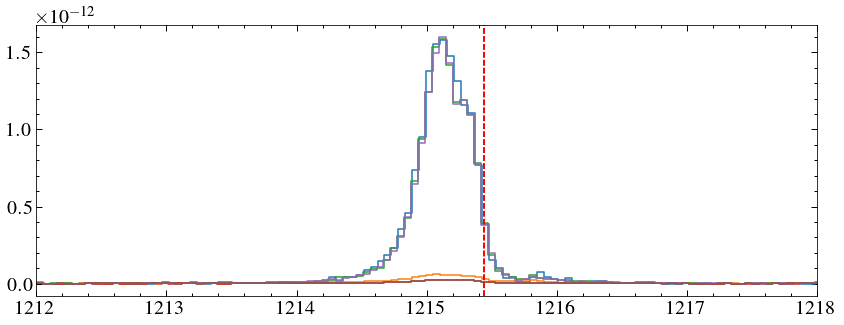

In [16]:
for x in g140m_x1ds:
    data = fits.getdata(x,1)[0]
    rootname = fits.getheader(x, 0)['ROOTNAME'] 
    date = fits.getheader(x, 0)['TDATEOBS']
    
   # if date in dates[0:3]:
    print(rootname,date)
    plt.step(data['WAVELENGTH'], data['FLUX'], where='mid')
    plt.step(data['WAVELENGTH'], data['ERROR'], where='mid')
    #plt.plot(data['WAVELENGTH'], data['FLUX'])
    #plt.plot(data['WAVELENGTH'], data['ERROR'])
    
   # plt.plot(lw, lf)
    plt.xlim(1212, 1218)

  #  plt.ylim(-1e-15, 1.4e-14)
   # plt.axhline(0, c='k', ls ='--')
    plt.axvline(1215.44, ls ='--', c='r')
    #plt.show()

Lya lines are the same, what about Nv?

odlm24030 2019-03-04
odlm24040 2019-03-04
odlm24050 2019-03-04


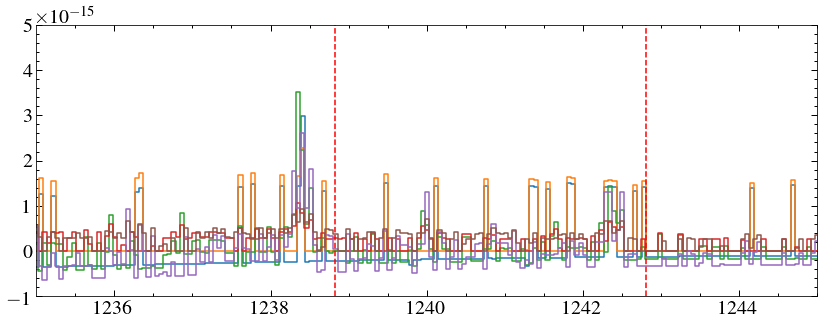

In [25]:
lines = [1238.821,1242.804]
for x in g140m_x1ds:
    data = fits.getdata(x,1)[0]
    rootname = fits.getheader(x, 0)['ROOTNAME'] 
    date = fits.getheader(x, 0)['TDATEOBS']
    
    print(rootname,date)
    plt.step(data['WAVELENGTH'], data['FLUX'], where='mid')
    plt.step(data['WAVELENGTH'], data['ERROR'], where='mid')
    #plt.plot(data['WAVELENGTH'], data['FLUX'])
    #plt.plot(data['WAVELENGTH'], data['ERROR'])
    
plt.xlim(1235, 1245)
plt.ylim(-1e-15, 0.5e-14)
[plt.axvline(line, c='r', ls='--') for line in lines]

In [146]:
def new_coadd(f_array, e_array):
    weights = 1 / (e_array**2)
    flux = np.average(f_array, axis =0, weights = weights)
    var = 1 / np.sum(weights, axis=0)
    rcs = np.sum((((flux - f_array)**2) * weights), axis=0) / (len(f_array)-1)
    error = (var * rcs)**0.5
    return flux, error

1024
1024
1024
1024


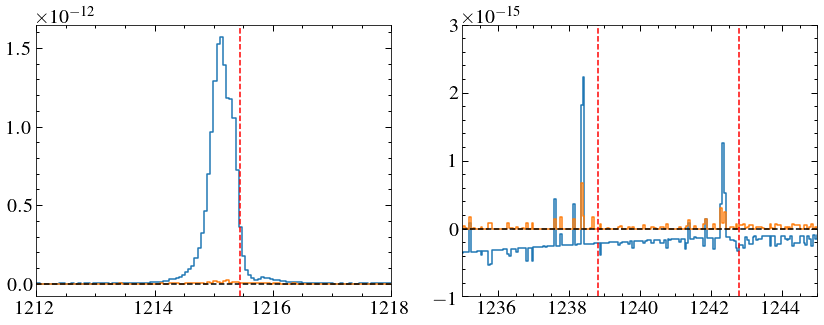

In [89]:
f_new = []
e_new = []
i = 0
for x in g140m_x1ds:
    data = fits.getdata(x,1)[0]
    if i == 0:
        w_new = data['WAVELENGTH']
       # w_new = np.arange(w_new[5], w_new[-6], np.mean(np.diff(w_new)))
        f_new.append(data['FLUX'])
        e_new.append(data['ERROR'])
        #print(len(w_new))
    else:
        fi = interpolate.interp1d(data['WAVELENGTH'], data['FLUX'], fill_value='extrapolate')(w_new)
      #  wi, fi, ei = resample.bintogrid(data['WAVELENGTH'], data['FLUX'], unc=data['ERROR'], newx = w_new, drop_nans=False)
        f_new.append(fi)
        ei = interpolate.interp1d(data['WAVELENGTH'], data['ERROR'], fill_value='extrapolate')(w_new)
        e_new.append(ei)
        print(len(fi))
        print(len(ei))
    i += 1

f_new, v_new, e_new, rcs = new_coadd(np.array(f_new), np.array(e_new))

plt.subplot(121)
plt.step(w_new, f_new, where='mid')
plt.step(w_new,e_new, where='mid')
#plt.step(w_new, v_new, where='mid')
#plt.errorbar(w_new, f_new, yerr=e_new)
#plt.plot(lw, lf)
plt.xlim(1212, 1218)

#plt.ylim(-1e-15, 1.4e-14)
#plt.ylim(-1e-15, 0.3e-14)
plt.axhline(0, c='k', ls ='--')
plt.axvline(1215.44, ls ='--', c='r')

plt.subplot(122)
plt.step(w_new, f_new, where='mid')
plt.step(w_new,e_new, where='mid')
#plt.step(w_new, v_new, where='mid')
#plt.errorbar(w_new, f_new, yerr=e_new)
#plt.plot(lw, lf)

#plt.ylim(-1e-15, 1.4e-14)
plt.axhline(0, c='k', ls ='--')
plt.xlim(1235, 1245)
plt.ylim(-1e-15, 0.3e-14)
[plt.axvline(line, c='r', ls='--') for line in lines]

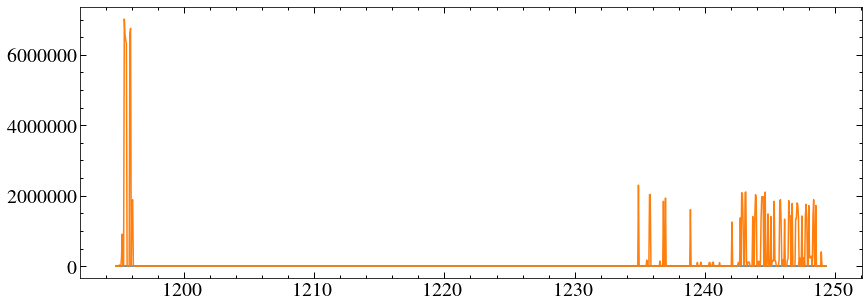

In [74]:
plt.plot(w_new, e_new)
#plt.plot(w_new, v_new**0.5)
plt.plot(w_new, rcs)


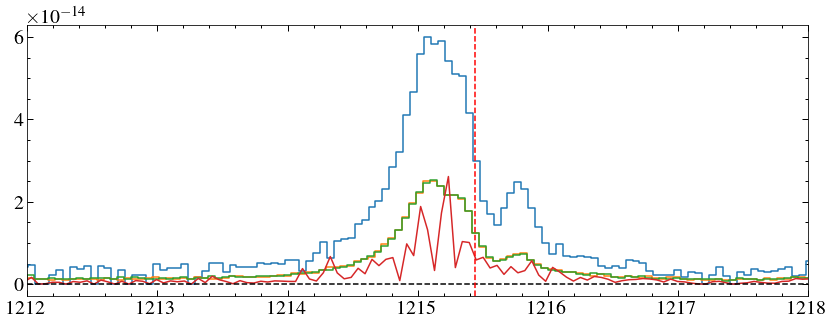

In [76]:
for x in g140m_x1ds:
    data = fits.getdata(x,1)[0]
   # plt.step(data['WAVELENGTH'], data['FLUX'], where='mid')
    plt.step(data['WAVELENGTH'], data['ERROR'], where='mid')
    #plt.plot(data['WAVELENGTH'], data['FLUX'])
    #plt.plot(data['WAVELENGTH'], data['ERROR'])
   
plt.plot(w_new, e_new)

plt.xlim(1212, 1218)
plt.axhline(0, c='k', ls ='--')
plt.axvline(1215.44, ls ='--', c='r')

Error is somewhat bigger on odlm24030- was that recalibrated? No- half the time

odlm24030 2019-03-04


(-3e-15, 3e-15)

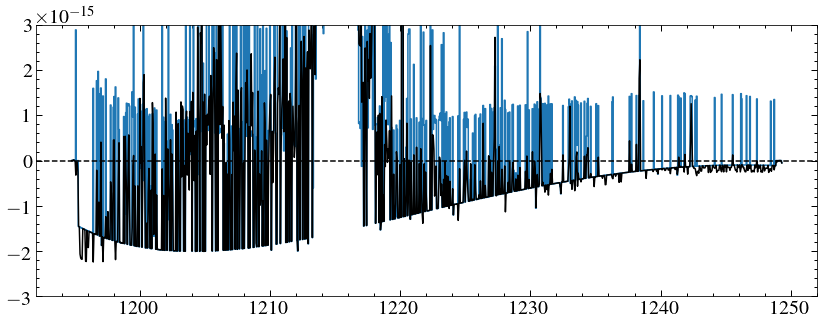

In [105]:
for x in g140m_x1ds[0:1]:
    data = fits.getdata(x,1)[0]
    rootname = fits.getheader(x, 0)['ROOTNAME'] 
    date = fits.getheader(x, 0)['TDATEOBS']
    
   # if date in dates[0:3]:
    print(rootname,date)
    plt.step(data['WAVELENGTH'], data['FLUX'], where='mid')
  #  plt.step(data['WAVELENGTH'], data['ERROR'], where='mid')
    #plt.plot(data['WAVELENGTH'], data['FLUX'])
    #plt.plot(data['WAVELENGTH'], data['ERROR'])
    

plt.plot(w_new, f_new, c='k')
plt.axhline(0, c='k', ls ='--')
plt.ylim(-3e-15, 0.3e-14)


In [106]:
w_3, f_3, e_3 = w_new, f_new, e_new

1024
1024


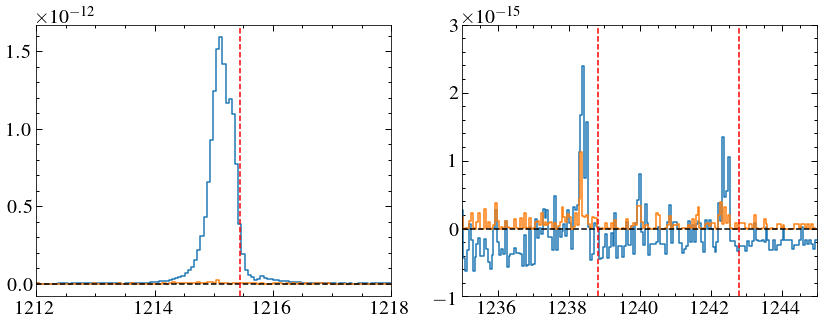

In [107]:
f_new = []
e_new = []
i = 0
for x in g140m_x1ds[1:]:
    data = fits.getdata(x,1)[0]
    if i == 0:
        w_new = data['WAVELENGTH']
       # w_new = np.arange(w_new[5], w_new[-6], np.mean(np.diff(w_new)))
        f_new.append(data['FLUX'])
        e_new.append(data['ERROR'])
        #print(len(w_new))
    else:
        fi = interpolate.interp1d(data['WAVELENGTH'], data['FLUX'], fill_value='extrapolate')(w_new)
      #  wi, fi, ei = resample.bintogrid(data['WAVELENGTH'], data['FLUX'], unc=data['ERROR'], newx = w_new, drop_nans=False)
        f_new.append(fi)
        ei = interpolate.interp1d(data['WAVELENGTH'], data['ERROR'], fill_value='extrapolate')(w_new)
        e_new.append(ei)
        print(len(fi))
        print(len(ei))
    i += 1

f_new, v_new, e_new, rcs = new_coadd(np.array(f_new), np.array(e_new))

plt.subplot(121)
plt.step(w_new, f_new, where='mid')
plt.step(w_new,e_new, where='mid')
#plt.step(w_new, v_new, where='mid')
#plt.errorbar(w_new, f_new, yerr=e_new)
#plt.plot(lw, lf)
plt.xlim(1212, 1218)

#plt.ylim(-1e-15, 1.4e-14)
#plt.ylim(-1e-15, 0.3e-14)
plt.axhline(0, c='k', ls ='--')
plt.axvline(1215.44, ls ='--', c='r')

plt.subplot(122)
plt.step(w_new, f_new, where='mid')
plt.step(w_new,e_new, where='mid')
#plt.step(w_new, v_new, where='mid')
#plt.errorbar(w_new, f_new, yerr=e_new)
#plt.plot(lw, lf)

#plt.ylim(-1e-15, 1.4e-14)
plt.axhline(0, c='k', ls ='--')
plt.xlim(1235, 1245)
plt.ylim(-1e-15, 0.3e-14)
[plt.axvline(line, c='r', ls='--') for line in lines]

(1212, 1218)

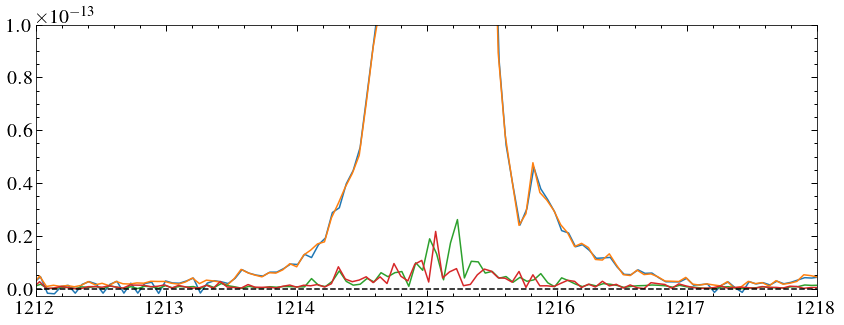

In [117]:
plt.plot(w_3, f_3)
plt.plot(w_new, f_new)
plt.plot(w_3, e_3)
plt.plot(w_new, e_new)
plt.axhline(0, c='k', ls ='--')
plt.ylim(-3e-15, 1e-13)
plt.xlim(1212, 1218)


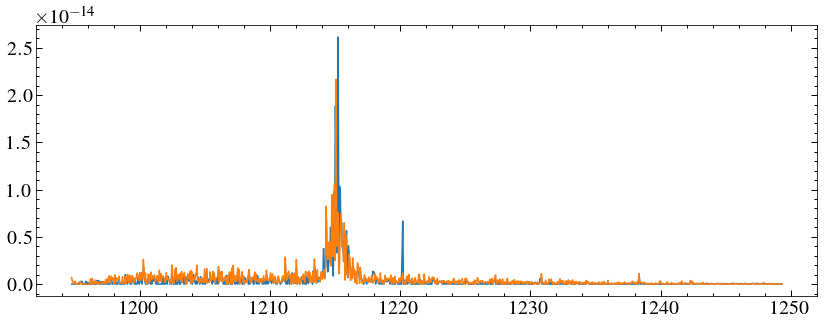

In [111]:
plt.plot(w_3, e_3)
plt.plot(w_new, e_new)

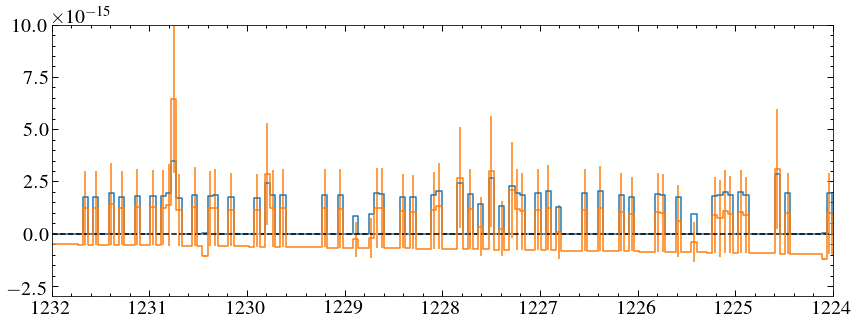

In [127]:
dt = fits.getdata(g140m_x1ds[0],1)[0]
#plt.step(dt['WAVELENGTH'], dt['FLUX'], where='mid')
plt.step(dt['WAVELENGTH'], dt['ERROR'], where='mid')
plt.errorbar(dt['WAVELENGTH'], dt['FLUX'], yerr=dt['ERROR'], drawstyle='steps-mid')
plt.ylim(-3e-15, 1e-14)
plt.xlim(1232, 1224)
plt.axhline(0, c='k', ls ='--')


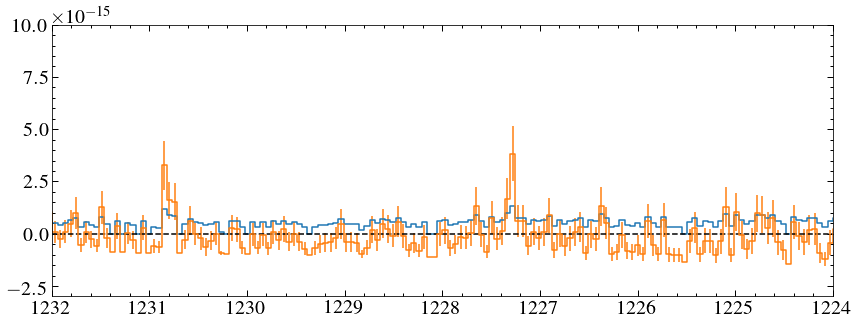

In [131]:
dt = fits.getdata(g140m_x1ds[2],1)[0]
#plt.step(dt['WAVELENGTH'], dt['FLUX'], where='mid')
plt.step(dt['WAVELENGTH'], dt['ERROR'], where='mid')
plt.errorbar(dt['WAVELENGTH'], dt['FLUX'], yerr=dt['ERROR'], drawstyle='steps-mid')
plt.ylim(-3e-15, 1e-14)
plt.xlim(1232, 1224)
plt.axhline(0, c='k', ls ='--')

So in the 1st spectrum, errorbars are set to zero when flux < 0. In the rest they are there but often less than the magnitude of the flux. Rextract the first one and see what happens? Or force errors to be larger?

In [132]:
import stistools

The following tasks in the stistools package can be run with TEAL:
   basic2d      calstis     ocrreject     wavecal        x1d          x2d


/home/david/anaconda3/lib/python3.6/site-packages/stsci/tools/nmpfit.py:10: UserWarning: NMPFIT is deprecated - stsci.tools v 3.4.13 is the last version to contain it.
  warnings.warn("NMPFIT is deprecated - stsci.tools v 3.4.13 is the last version to contain it.")
/home/david/anaconda3/lib/python3.6/site-packages/stsci/tools/gfit.py:20: UserWarning: GFIT is deprecated - stsci.tools v 3.4.12 is the last version to contain it.Use astropy.modeling instead.
  warnings.warn("GFIT is deprecated - stsci.tools v 3.4.12 is the last version to contain it."


In [133]:
g140m_x1ds[0]

'/home/david/work/muscles/MegaMUSCLES/GJ_699/HST/STIS/odlm24030_x1d.fits'

In [135]:
bad_flat = path+'odlm24030_flt.fits'
os.environ['oref'] = path

In [136]:
stistools.calstis.calstis(bad_flat,wavecal=path+'odlm24030_wav.fits', outroot = 'recals/odlm24030', trailer = 'recals/odlm24030_rextract.trl', verbose=True)

Running calstis on /home/david/work/muscles/MegaMUSCLES/GJ_699/HST/STIS/odlm24030_flt.fits
  ['cs0.e', '-v', '/home/david/work/muscles/MegaMUSCLES/GJ_699/HST/STIS/odlm24030_flt.fits', 'recals/odlm24030', '-w', '/home/david/work/muscles/MegaMUSCLES/GJ_699/HST/STIS/odlm24030_wav.fits']


0

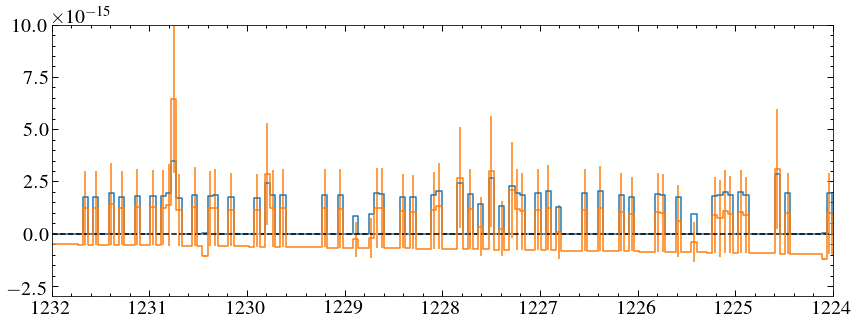

In [137]:
dt = fits.getdata('recals/odlm24030_x1d.fits',1)[0]
#plt.step(dt['WAVELENGTH'], dt['FLUX'], where='mid')
plt.step(dt['WAVELENGTH'], dt['ERROR'], where='mid')
plt.errorbar(dt['WAVELENGTH'], dt['FLUX'], yerr=dt['ERROR'], drawstyle='steps-mid')
plt.ylim(-3e-15, 1e-14)
plt.xlim(1232, 1224)
plt.axhline(0, c='k', ls ='--')

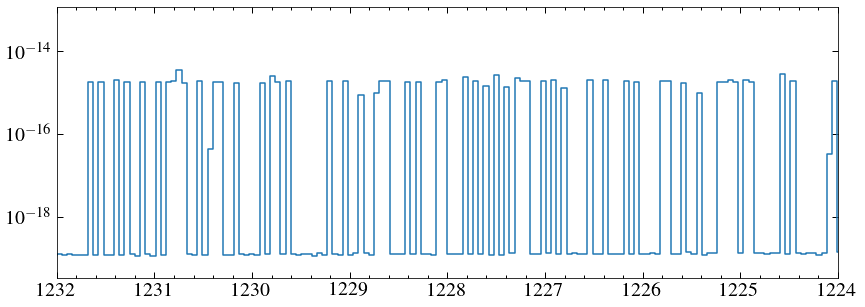

In [145]:
plt.step(dt['WAVELENGTH'], dt['ERROR'], where='mid')
#plt.ylim(-3e-15, 1e-14)
plt.xlim(1232, 1224)
plt.yscale('log')

(1232, 1224)

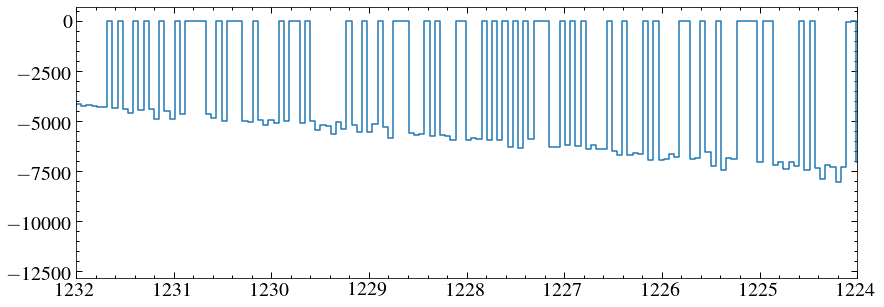

In [142]:
plt.step(dt['WAVELENGTH'], dt['FLUX']/dt['ERROR'], where='mid')
plt.xlim(1232, 1224)

Ok, what we set e =f where f < 0

In [188]:
def no_zero_errors(f, e):
    e_new = e
    for i in range(len(e)):
        if f[i] < 0.0 and e[i] < 0.1*abs(f[i]):
            e_new[i] = abs(f[i])
    return e_new

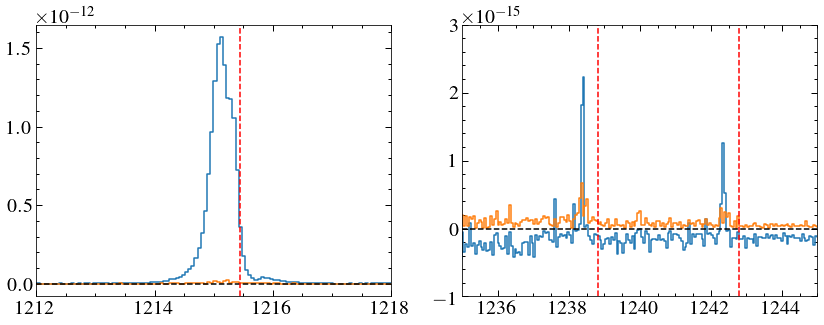

In [150]:
f_new = []
e_new = []
i = 0
for x in g140m_x1ds:
    data = fits.getdata(x,1)[0]
    if i == 0:
        w_new = data['WAVELENGTH']
        fi, ei = data['FLUX'], data['ERROR']
        ei = correct_error(fi, ei)

        #print(len(w_new))
    else:
        fi = interpolate.interp1d(data['WAVELENGTH'], data['FLUX'], fill_value='extrapolate')(w_new)
        ei = interpolate.interp1d(data['WAVELENGTH'], data['ERROR'], fill_value='extrapolate')(w_new)
        ei = correct_error(fi, ei)
    f_new.append(fi)
    e_new.append(ei)
    i += 1

f_new, e_new = new_coadd(np.array(f_new), np.array(e_new))

plt.subplot(121)
plt.step(w_new, f_new, where='mid')
plt.step(w_new,e_new, where='mid')
#plt.step(w_new, v_new, where='mid')
#plt.errorbar(w_new, f_new, yerr=e_new)
#plt.plot(lw, lf)
plt.xlim(1212, 1218)

#plt.ylim(-1e-15, 1.4e-14)
#plt.ylim(-1e-15, 0.3e-14)
plt.axhline(0, c='k', ls ='--')
plt.axvline(1215.44, ls ='--', c='r')

plt.subplot(122)
plt.step(w_new, f_new, where='mid')
plt.step(w_new,e_new, where='mid')
#plt.step(w_new, v_new, where='mid')
#plt.errorbar(w_new, f_new, yerr=e_new)
#plt.plot(lw, lf)

#plt.ylim(-1e-15, 1.4e-14)
plt.axhline(0, c='k', ls ='--')
plt.xlim(1235, 1245)
plt.ylim(-1e-15, 0.3e-14)
[plt.axvline(line, c='r', ls='--') for line in lines]

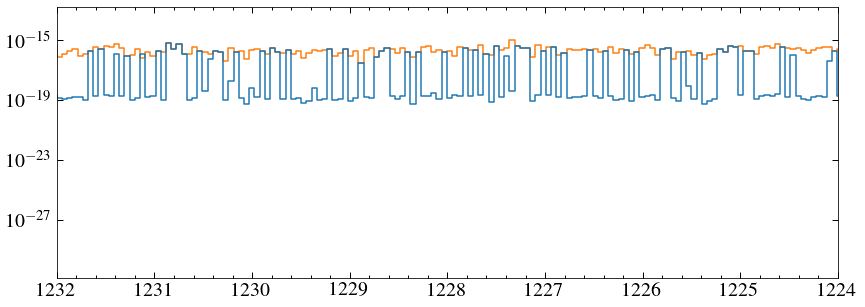

In [167]:
#plt.step(w_3, f_3, where='mid')
#plt.step(w_new, f_new,where='mid')
plt.step(w_3, e_3,where='mid')
plt.step(w_new, e_new,where='mid', zorder=-1)
plt.axhline(0, c='k', ls ='--')
#plt.ylim(-3e-15, 1e-13)
#plt.xlim(1212, 1218)
#plt.ylim(-1e-15, 2e-15)
plt.xlim(1232, 1224)
plt.yscale('log')

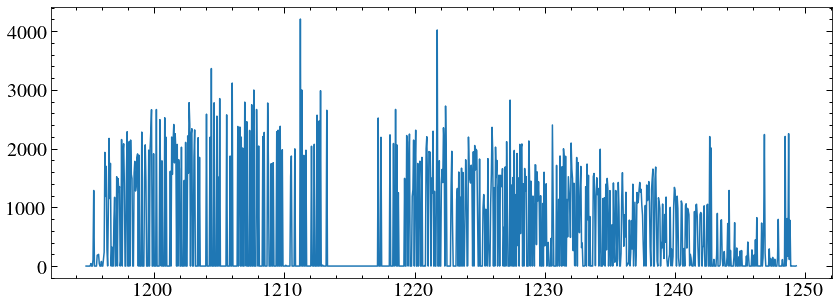

In [158]:
plt.plot(w_new, e_new/e_3)

What about a dq summer?

In [208]:
def coadd_x1ds(x1ds, correct_error=False, make_dq=False):
    f_new = []
    e_new = []
    dq_new = []
    i = 0
    for x in x1ds:
        data = fits.getdata(x,1)[0]
        if i == 0:
            w_new = data['WAVELENGTH']
            fi, ei, dqi = data['FLUX'], data['ERROR'], data['DQ']
            
            
            #print(len(w_new))
        else:
            fi = interpolate.interp1d(data['WAVELENGTH'], data['FLUX'], fill_value='extrapolate')(w_new)
            ei = interpolate.interp1d(data['WAVELENGTH'], data['ERROR'], fill_value='extrapolate')(w_new)
            dqi =  interpolate.interp1d(data['WAVELENGTH'], data['DQ'], kind='nearest',fill_value='extrapolate')(w_new)
        if correct_error:    
            ei = no_zero_errors(fi, ei)
        f_new.append(fi)
        e_new.append(ei)
        dq_new.append(dqi)
        
        i += 1

    f_new, e_new = new_coadd(np.array(f_new), np.array(e_new))
    
    if make_dq:
        dq_new = np.array(dq_new, dtype=int)
        dq_new = [(np.sum(np.unique(dq_new[:,i]))) for i in range(len(dq_new[0]))]  
        return w_new, f_new, e_new, dq_new
    else:
        return w_new, f_new, e_new


In [209]:
w_new, f_new, e_new, dq_new = coadd_x1ds(g140m_x1ds, correct_error=True, make_dq=True)

(0, 100)

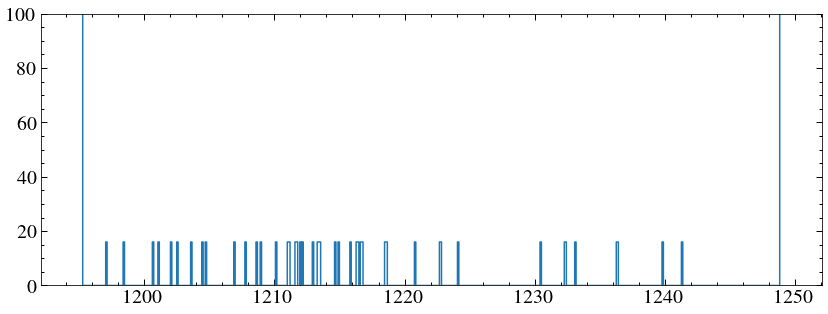

In [210]:
plt.step(w_new, dq_new, where='mid')
#plt.yscale('log')
plt.ylim(0,100)

In [211]:
savedata = Table([w_new*u.AA, f_new*u.erg/u.s/u.cm**2/u.AA, e_new*u.erg/u.s/u.cm**2/u.AA, dq_new], names=['WAVELENGTH','FLUX','ERROR', 'DQ'], meta = {'STAR': 'GJ_699', 'TELESCOPE':'HST', 'INSTRUMENT':'STIS', 'GRATING':'G140M'})
ascii.write(savedata, 'gj_699_g140m_v1.ecsv', format='ecsv', overwrite=True)

In [212]:
coadd = Table.read('gj_699_g140m_v1.ecsv')

In [213]:
coadd

WAVELENGTH,FLUX,ERROR,DQ
Angstrom,erg / (Angstrom cm2 s),erg / (Angstrom cm2 s),
float64,float64,float64,int64
1194.7735174691202,-1.1915698347241543e-18,2.474212049720109e-19,2564
1194.8270100412044,3.919629005178137e-18,1.8886606128398343e-19,2564
1194.8805022643162,2.0914492489246652e-18,1.8831774538895677e-19,2564
1194.933994138463,1.642523481620005e-17,1.3143987399100609e-19,2564
1194.9874856636516,-3.9880609558500295e-19,1.7065175019377498e-19,4612
1195.0409768398883,-9.547547790347375e-19,2.2413633305688503e-19,2048
1195.0944676671804,-5.4722686088991494e-17,1.6038879650738976e-16,2064
1195.1479581455344,-1.2271594271917e-16,4.8389160697595466e-17,4112


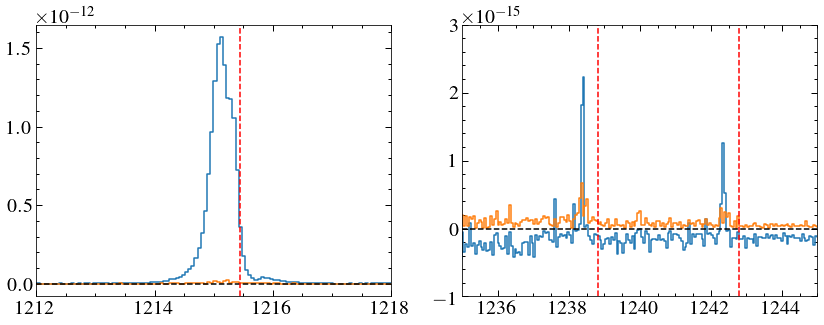

In [214]:
plt.subplot(121)
plt.step(w_new, f_new, where='mid')
plt.step(w_new,e_new, where='mid')
#plt.step(w_new, v_new, where='mid')
#plt.errorbar(w_new, f_new, yerr=e_new)
#plt.plot(lw, lf)
plt.xlim(1212, 1218)

#plt.ylim(-1e-15, 1.4e-14)
#plt.ylim(-1e-15, 0.3e-14)
plt.axhline(0, c='k', ls ='--')
plt.axvline(1215.44, ls ='--', c='r')

plt.subplot(122)
plt.step(w_new, f_new, where='mid')
plt.step(w_new,e_new, where='mid')
#plt.step(w_new, v_new, where='mid')
#plt.errorbar(w_new, f_new, yerr=e_new)
#plt.plot(lw, lf)

#plt.ylim(-1e-15, 1.4e-14)
plt.axhline(0, c='k', ls ='--')
plt.xlim(1235, 1245)
plt.ylim(-1e-15, 0.3e-14)
[plt.axvline(line, c='r', ls='--') for line in lines]

Ok looks like it's working, translate to a script.  

How to get unquie gratings, cenwaves?

In [242]:
#setups = np.array([], dtype=str)
setups = []
for x in x1ds:
    hdr = fits.getheader(x,0)
    grating = hdr['OPT_ELEM']
    cenwave = hdr['CENWAVE']
    #setups.append('%s_%s' %(grating, cenwave))
    setups.append([grating, cenwave])
setups = np.unique(setups, axis=0)
setups

array([['G140L', '1425'],
       ['G140M', '1222'],
       ['G230L', '2376']], dtype='<U5')

In [250]:
x1d_collections = []
for s in setups:
    collection = []
    for x in x1ds:
        hdr = fits.getheader(x,0)
        grating = hdr['OPT_ELEM']
        cenwave = hdr['CENWAVE']
        if grating == s[0] and str(cenwave) == s[1]:
            collection.append(x)
    if len(collection) > 0:
        x1d_collections.append(collection)
print(x1d_collections)

[['/home/david/work/muscles/MegaMUSCLES/GJ_699/HST/STIS/odlm22030_x1d.fits', '/home/david/work/muscles/MegaMUSCLES/GJ_699/HST/STIS/odlm22010_x1d.fits', '/home/david/work/muscles/MegaMUSCLES/GJ_699/HST/STIS/odlm22020_x1d.fits'], ['/home/david/work/muscles/MegaMUSCLES/GJ_699/HST/STIS/odlm24030_x1d.fits', '/home/david/work/muscles/MegaMUSCLES/GJ_699/HST/STIS/odlm24040_x1d.fits', '/home/david/work/muscles/MegaMUSCLES/GJ_699/HST/STIS/odlm24050_x1d.fits'], ['/home/david/work/muscles/MegaMUSCLES/GJ_699/HST/STIS/odlm24020_x1d.fits']]


In [260]:
for c,s  in zip(x1d_collections, setups):
    print('setup = ', s)
    for x in c:
        hdr = fits.getheader(x,0)
        grating = hdr['OPT_ELEM']
        cenwave = hdr['CENWAVE']
        print(grating, cenwave)

setup =  ['G140L' '1425']
G140L 1425
G140L 1425
G140L 1425
setup =  ['G140M' '1222']
G140M 1222
G140M 1222
G140M 1222
setup =  ['G230L' '2376']
G230L 2376


Ok we can make that a bit cleaner, only opening each fits file once

In [259]:
gratings = []
cenwaves = []
setups = []
x1d_collections = []
for x in x1ds:
    hdr = fits.getheader(x,0)
    grating = hdr['OPT_ELEM']
    cenwave = hdr['CENWAVE']
    gratings.append(grating)
    cenwaves.append(cenwave)
    setups.append([grating, cenwave])
setups = np.unique(setups, axis=0)

for s in setups:
    collection = []
    for i in range(len(x1ds)):
        if gratings[i] == s[0] and str(cenwaves[i]) == s[1]:
            collection.append(x1ds[i])
    if len(collection) > 0:
        x1d_collections.append(collection)

What about the metadata? Star, instrument(s), total exposure time, start time, endtime.  

In [261]:
fits.getheader(x1ds[0])

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS file may contain extensions               
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
ORIGIN  = 'HSTIO/CFITSIO March 2010' / FITS file originator                     
DATE    = '2019-03-04' / date this file was written (yyyy-mm-dd)                
NEXTEND =                    1 / Number of extensions                           
FILENAME= 'odlm24020_x1d.fits' / name of file                                   
FILETYPE= 'SCI      '          / type of data found in data file                
                                                                                
TELESCOP= 'HST'             

In [346]:
def make_metadata(x1ds, wavelength, flux):
    exptimes = []
    start_times = []
    end_times = []
    dates = []
    for x in x1ds:      
        hdr = fits.getheader(x,0)
        exptimes.append(hdr['TEXPTIME'])
        start_times.append(hdr['TEXPSTRT'])
        end_times.append(hdr['TEXPEND'])
        dates.append(hdr['TDATEOBS'])
   # telecopes.append(hdr['TELESCOP'])
    #gratings.append(hdr['OPT_ELEM'])
    muscles_name = 'Measurements of the Ultraviolet Spectral Characteristics of Low-mass Exoplanet Host Stars'
    meta_names =  ['TELESCOP', 'INSTRUME','GRATING','APERTURE','TARGNAME','RA_TARG','DEC_TARG','PROPOSID','HLSPNAME','HLSPACRN','HLSPLEAD','PR_INV_L','PR_INV_F',
                  'DATE-OBS','EXPSTART','EXPEND','EXPTIME','EXPDEFN','EXPMIN','EXPMAX','EXPMED','NORMFAC','WAVEMIN','WAVEMAX','WAVEUNIT','AIRORVAC','SPECRES','WAVERES','FLUXMIN',
                  'FLUXMAX','FLUXUNIT']
    meta_fill = ['','',hdr['OPT_ELEM'],'','','','','',muscles_name,'MUSCLES','David J. Wilson','','',min(dates),min(start_times),max(end_times),sum(exptimes),'SUM', 
                min(exptimes), max(exptimes), np.median(exptimes),1.0,wavelength[0], wavelength[-1],'ang','vac',0,0,np.min(flux), np.max(flux),'erg/s/cm2/ang']
    metadata = {}
    for name, filler in zip(meta_names, meta_fill):
        if filler == '':
            metadata[name] = hdr[name]
        else:
            metadata[name] = filler
    return metadata
    
metadata = make_metadata(g140m_x1ds, w_new, f_new) 

Need:  
TELESCOP= 'HST     '                                                            
INSTRUME= 'COS     '                                                            
GRATING = 'G130M   '                                                            
APERTURE= 'PSA     '                                                            
TARGNAME= 'GJ176   '                                                            
RA_TARG =    70.73239599999999                                                  
DEC_TARG=            18.958163                                                  
PROPOSID=                13650                                                  
HLSPNAME= 'Measurements of the Ultraviolet Spectral Characteristics of &'       
CONTINUE  'Low-mass Exoplanet Host Stars'                                       
HLSPACRN= 'MUSCLES '                                                            
HLSPLEAD= 'R. O. Parke Loyd'                                                    
PR_INV_L= 'France  '                                                            
PR_INV_F= 'Kevin   '                                                            
DATE-OBS= '2015-03-02T03:25:32.376'                                             
EXPSTART=       57083.14273583                                                  
EXPEND  =           57083.4235                                                  
EXPTIME =            12599.968                                                  
EXPDEFN = 'MEDIAN  '                                                            
EXPMAX  =            12599.968                                                  
EXPMIN  =             2709.184                                                  
EXPMED  =            12599.968                                                  
NORMFAC =                  1.0 / normalization factor used by MUSCLES           
WAVEMIN =    1137.547180294333                                                  
WAVEMAX =    1459.500239440708                                                  
WAVEUNIT= 'ang     '                                                            
AIRORVAC= 'vac     '                                                            
SPECRES =    1298.488382238483                                                  
WAVERES = 0.009966384646759252                                                  
FLUXMIN = -1.1788800742582E-16                                                  
FLUXMAX = 2.19430576170784E-12                                                  
FLUXUNIT= 'erg/s/cm2/ang'     

Need to build a wavelength over all possible cenwaves.

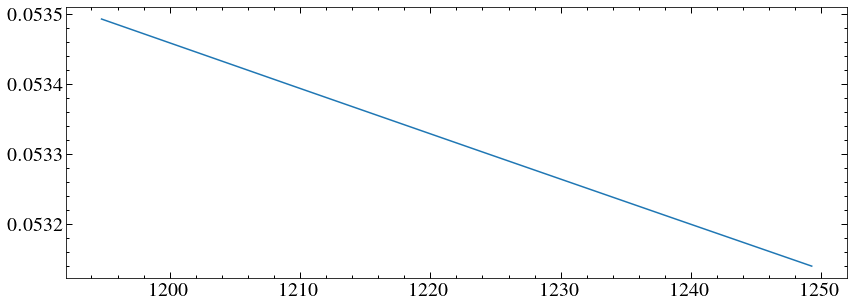

In [262]:
plt.plot(w_new[:-1], np.diff(w_new))

In [263]:
np.diff(w_new)[0]/w_new[-1]

4.28175148975296e-05

Ok difference is tiny, should be ok using max of np.diff

Did the script work? 

In [332]:
test_g140m = Table.read('test_files/GJ699_G140M_coadd.ecsv') 

In [333]:
test_g140m.meta

OrderedDict([('AIRORVAC', 'vac'),
             ('APERTURE', '52X0.1'),
             ('DATE-OBS', '2019-03-04'),
             ('DEC_TARG', 4.74810340755),
             ('EXPDEFN', 'SUM'),
             ('EXPEND', 58546.62723952),
             ('EXPMAX', 2726.184125),
             ('EXPMED', 2726.172875),
             ('EXPMIN', 480.011125),
             ('EXPSTART', 58546.49076971),
             ('EXPTIME', 5932.368125000001),
             ('FLUXMAX', 1.55236940611284e-12),
             ('FLUXMIN', -1.9773154449908342e-15),
             ('FLUXUNIT', 'erg/s/cm2/ang'),
             ('GRATING', 'G140M'),
             ('HLSPACRN', 'MUSCLES'),
             ('HLSPLEAD', 'David J. Wilson'),
             ('HLSPNAME',
              'Measurements of the Ultraviolet Spectral Characteristics of Low-mass Exoplanet Host Stars'),
             ('INSTRUME', 'STIS'),
             ('NORMFAC', 1.0),
             ('PROPOSID', 15071),
             ('PR_INV_F', 'Cynthia'),
             ('PR_INV_L', 'Froning'),

In [334]:
test_g140m

WAVELENGTH,WAVELENGTH0,WAVELENGTH1,FLUX,ERROR,EXPTIME,DQ,EXPSTART,EXPEND
Angstrom,Angstrom,Angstrom,erg / (Angstrom cm2 s),erg / (Angstrom cm2 s),s,,MJD,MJD
float64,float64,float64,float64,float64,float64,int64,float64,float64
1194.7657250198176,1194.7389787337756,1194.7924713058596,nan,nan,2726.184125,2564,58546.5956886,58546.62723952
1194.8192175919019,1194.7924713058596,1194.845963877944,3.1750641218533715e-18,1.8840812355093243e-19,5932.368125000001,2564,58546.49076971,58546.62723952
1194.872710163986,1194.845963877944,1194.899456450028,2.3577454481985557e-18,1.8782758477138828e-19,5932.368125000001,2564,58546.49076971,58546.62723952
1194.9262027360703,1194.899456450028,1194.9529490221125,9.882253470277478e-18,2.015312057584153e-18,5932.368125000001,2564,58546.49076971,58546.62723952
1194.9796953081545,1194.9529490221125,1195.0064415941965,2.051340799372079e-18,1.8977508953799284e-19,5932.368125000001,4612,58546.49076971,58546.62723952
1195.0331878802388,1195.0064415941965,1195.059934166281,-2.3339857707521472e-19,2.7297130502534263e-19,5932.368125000001,2048,58546.49076971,58546.62723952
1195.086680452323,1195.059934166281,1195.113426738365,-3.343792042320471e-16,1.7040217573552185e-16,5932.368125000001,2064,58546.49076971,58546.62723952
1195.1401730244072,1195.113426738365,1195.1669193104494,-1.8544475367575805e-16,3.7538989354825794e-17,5932.368125000001,4112,58546.49076971,58546.62723952


(-1e-13, 1e-13)

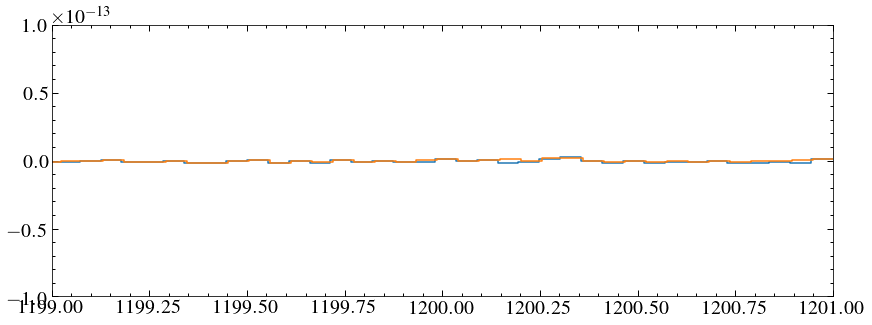

In [297]:
plt.step(test_g140m['WAVELENGTH'], test_g140m['FLUX'], where='mid')
plt.step(w_new, f_new, where='mid')
plt.xlim(1199, 1201)
plt.ylim(-1e-13, 1e-13)

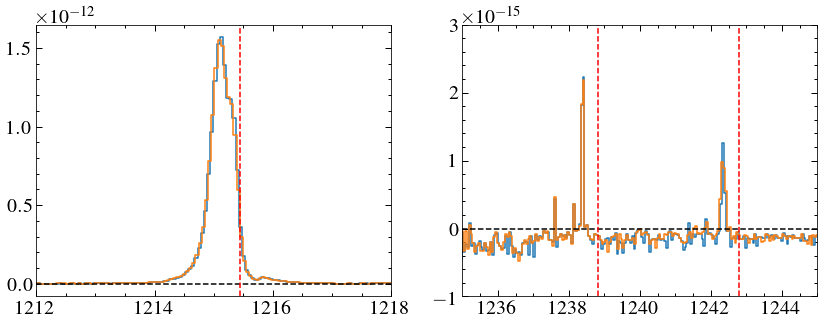

In [287]:
plt.subplot(121)
plt.step(w_new, f_new, where='mid')
plt.step(test_g140m['WAVELENGTH'], test_g140m['FLUX'], where='mid')

#plt.step(w_new,e_new, where='mid')
plt.xlim(1212, 1218)

#plt.ylim(-1e-15, 1.4e-14)
#plt.ylim(-1e-15, 0.3e-14)
plt.axhline(0, c='k', ls ='--')
plt.axvline(1215.44, ls ='--', c='r')

plt.subplot(122)
plt.step(w_new, f_new, where='mid')
plt.step(test_g140m['WAVELENGTH'], test_g140m['FLUX'], where='mid')

#plt.step(w_new,e_new, where='mid')

plt.axhline(0, c='k', ls ='--')
plt.xlim(1235, 1245)
plt.ylim(-1e-15, 0.3e-14)
[plt.axvline(line, c='r', ls='--') for line in lines]

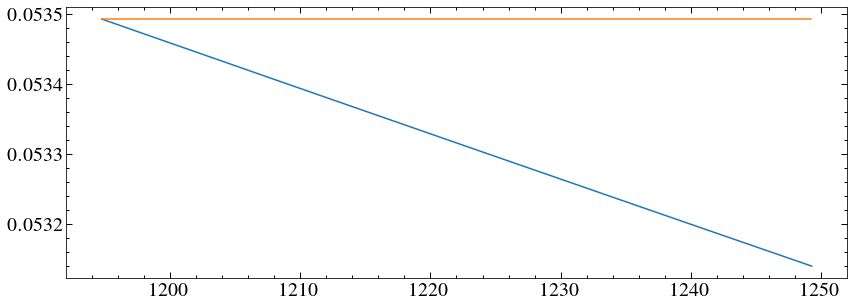

In [289]:
plt.plot(w_new[:-1], np.diff(w_new))
plt.plot(test_g140m['WAVELENGTH'][:-1], np.diff(test_g140m['WAVELENGTH']))

(0, 10)

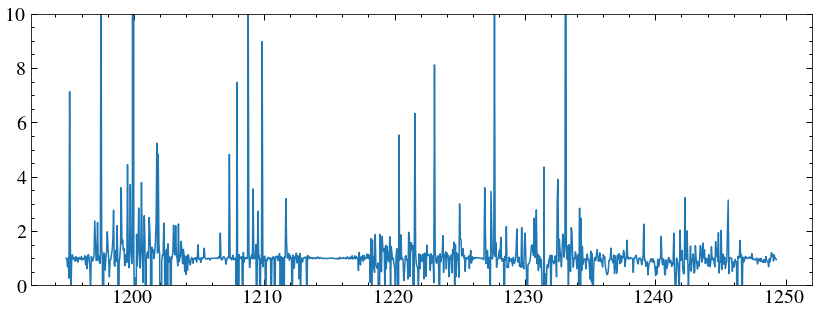

In [304]:
fi = interpolate.interp1d(w_new, f_new, fill_value='extrapolate')(test_g140m['WAVELENGTH'])
plt.plot(test_g140m['WAVELENGTH'], test_g140m['FLUX']/fi)
#plt.xlim(1199, 1201)
plt.ylim(0,10)

In [301]:
len(w_new), len(test_g140m['WAVELENGTH'])

(1024, 1020)

(-5, 10)

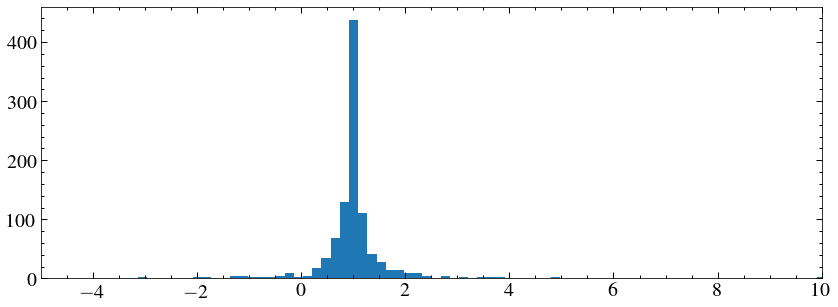

In [307]:
plt.hist( test_g140m['FLUX']/fi, bins=1000)
plt.xlim(-5, 10)

Can I save the table as a fits file?

In [318]:
test_g140m.write('test1.fits', overwrite=True)

In [319]:
hdul = fits.open('test1.fits')

In [322]:
hdul[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   32 / length of dimension 1                          
NAXIS2  =                 1020 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    4 / number of table fields                         
TTYPE1  = 'WAVELENGTH'                                                          
TFORM1  = 'D       '                                                            
TUNIT1  = 'Angstrom'                                                            
TTYPE2  = 'FLUX    '                                                            
TFORM2  = 'D       '        

No, header goes to data extension.   

To do: add exp time columns, fits saveing 

In [335]:
os.listdir('test_files')

['GJ699_G140M_coadd.ecsv',
 'GJ699_G140L_coadd.ecsv',
 '.ipynb_checkpoints',
 'GJ699_G230L_coadd.ecsv']

In [344]:
Table.read('test_files/GJ699_G140L_coadd.ecsv')

WAVELENGTH,WAVELENGTH0,WAVELENGTH1,FLUX,ERROR,EXPTIME,DQ,EXPSTART,EXPEND
Angstrom,Angstrom,Angstrom,erg / (Angstrom cm2 s),erg / (Angstrom cm2 s),s,,MJD,MJD
float64,float64,float64,float64,float64,float64,int64,float64,float64
1120.0968614576004,1119.8049167129666,1120.3888062022343,0.0,0.0,2728.18925,2564,58546.39701971,58546.42859378
1120.680750946868,1120.3888062022343,1120.972695691502,0.0,0.0,7018.552874999999,2564,58546.27958897,58546.42859378
1121.2646404361358,1120.972695691502,1121.5565851807696,0.0,0.0,7018.552874999999,2564,58546.27958897,58546.42859378
1121.8485299254035,1121.5565851807696,1122.1404746700373,0.0,0.0,7018.552874999999,2564,58546.27958897,58546.42859378
1122.4324194146711,1122.1404746700373,1122.724364159305,0.0,0.0,7018.552874999999,2560,58546.27958897,58546.42859378
1123.0163089039388,1122.724364159305,1123.3082536485726,0.0,0.0,7018.552874999999,2560,58546.27958897,58546.42859378
1123.6001983932065,1123.3082536485726,1123.8921431378403,0.0,0.0,7018.552874999999,512,58546.27958897,58546.42859378
1124.1840878824742,1123.8921431378403,1124.476032627108,0.0,0.0,7018.552874999999,512,58546.27958897,58546.42859378


Looks like the csv files are working well. What about fits? And resolution?

In [347]:
metadata

{'TELESCOP': 'HST',
 'INSTRUME': 'STIS',
 'GRATING': 'G140M',
 'APERTURE': '52X0.1',
 'TARGNAME': 'GJ699',
 'RA_TARG': 269.447952129,
 'DEC_TARG': 4.74810340755,
 'PROPOSID': 15071,
 'HLSPNAME': 'Measurements of the Ultraviolet Spectral Characteristics of Low-mass Exoplanet Host Stars',
 'HLSPACRN': 'MUSCLES',
 'HLSPLEAD': 'David J. Wilson',
 'PR_INV_L': 'Froning',
 'PR_INV_F': 'Cynthia',
 'DATE-OBS': '2019-03-04',
 'EXPSTART': 58546.49076971,
 'EXPEND': 58546.62723952,
 'EXPTIME': 5932.368125000001,
 'EXPDEFN': 'SUM',
 'EXPMIN': 480.011125,
 'EXPMAX': 2726.184125,
 'EXPMED': 2726.172875,
 'NORMFAC': 1.0,
 'WAVEMIN': 1194.7735174691202,
 'WAVEMAX': 1249.3151975830847,
 'WAVEUNIT': 'ang',
 'AIRORVAC': 'vac',
 'SPECRES': 0,
 'WAVERES': 0,
 'FLUXMIN': -2.1866215801405014e-15,
 'FLUXMAX': 1.5701846435399575e-12,
 'FLUXUNIT': 'erg/s/cm2/ang'}

Compare gl40m with g140l

In [349]:
g140l_test = Table.read('test_files/GJ699_G140L_coadd.ecsv')

8.524139777942809e-13 7.789706636555569e-13 1.0942825161015293


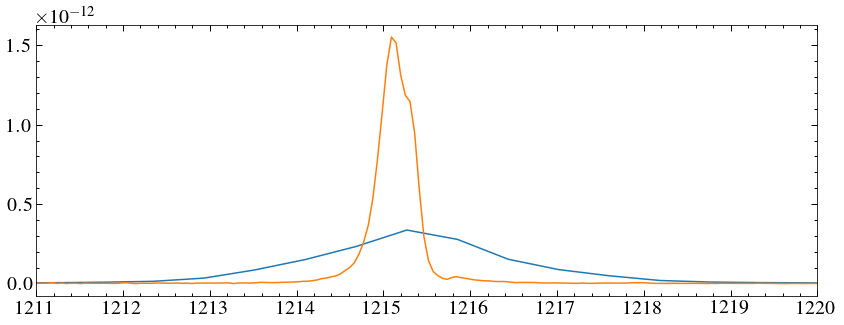

In [369]:
plt.plot(g140l_test['WAVELENGTH'], g140l_test['FLUX'])
plt.plot(test_g140m['WAVELENGTH'], test_g140m['FLUX'])
plt.xlim(1211, 1220)
#plt.xlim(1235, 1245)
#plt.ylim(-1e-15, 0.3e-14)
wl, fl, wm, fm = g140l_test['WAVELENGTH'], g140l_test['FLUX'],test_g140m['WAVELENGTH'], test_g140m['FLUX'] 
l_int = np.trapz(fl[(wl > 1211) & (wl < 1220)], wl[(wl > 1211) & (wl < 1220)])
m_int = np.trapz(fm[(wm > 1211) & (wm < 1220)], wm[(wm > 1211) & (wm < 1220)])
print(l_int, m_int, l_int/m_int)

Ok not to useful to compare. Was there a flare in the G140m data?

odlm24030 2019-03-04
odlm24040 2019-03-04
odlm24050 2019-03-04


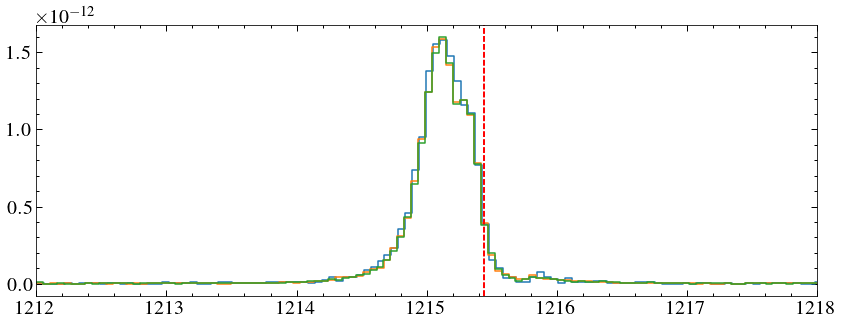

In [356]:
for x in g140m_x1ds:
    data = fits.getdata(x,1)[0]
    rootname = fits.getheader(x, 0)['ROOTNAME'] 
    date = fits.getheader(x, 0)['TDATEOBS']
    
   # if date in dates[0:3]:
    print(rootname,date)
    plt.step(data['WAVELENGTH'], data['FLUX'], where='mid')
  #  plt.step(data['WAVELENGTH'], data['ERROR'], where='mid')
    #plt.plot(data['WAVELENGTH'], data['FLUX'])
    #plt.plot(data['WAVELENGTH'], data['ERROR'])
    
   # plt.plot(lw, lf)
    plt.xlim(1212, 1218)

  #  plt.ylim(-1e-15, 1.4e-14)
   # plt.axhline(0, c='k', ls ='--')
    plt.axvline(1215.44, ls ='--', c='r')
    #plt.show()

In [378]:
for x in g140m_x1ds:
    flaretag = x[:-8]+'tag.fits'
    rootname = fits.getheader(flaretag)['ROOTNAME']
    exptime = fits.getheader(flaretag)['TEXPTIME']
    rcount = int(exptime/100)
    stistools.inttag.inttag(flaretag, 'flare_search/'+rootname+'_100s_raw.fits', rcount = rcount, increment = 30, verbose=False)

In [363]:
os.listdir('flare_search/')

['odlm24040_raw.fits', 'odlm24030_raw.fits', 'odlm24050_raw.fits']

In [379]:
flare_raws = glob.glob('flare_search/*100s_raw.fits')
for raw in flare_raws:
    rootname = fits.getheader(raw)['ROOTNAME']
    stistools.calstis.calstis(raw, outroot = 'flare_search/'+rootname+'_100s_split',wavecal=path+rootname+'_wav.fits', trailer='recals/lc_extract.trl')


In [380]:
flare_x1ds = glob.glob('flare_search/*100s_split_x1d.fits')
flare_x1ds

['flare_search/odlm24030_100s_split_x1d.fits',
 'flare_search/odlm24050_100s_split_x1d.fits',
 'flare_search/odlm24040_100s_split_x1d.fits']

/home/david/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


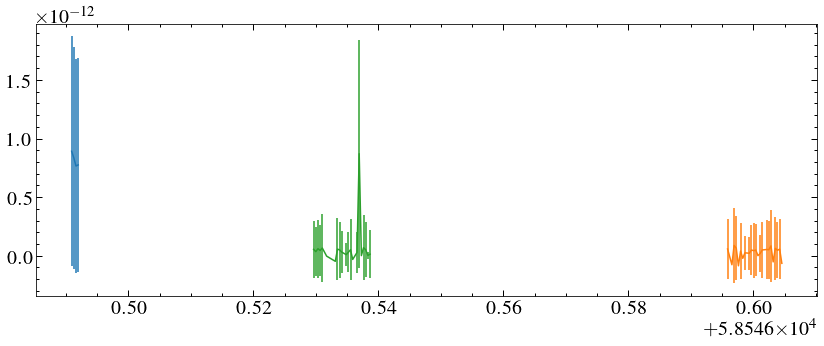

In [383]:
for x in flare_x1ds:
    hdul = fits.open(x)
    f_lc = []
    e_lc = []
    t_lc = []
    for ext in hdul[1:]:
        dt = ext.data[0]
        hdr = ext.header
        t = (hdr['EXPSTART'] + hdr['EXPEND'])/2
        w, f, e, c = dt['WAVELENGTH'], dt['FLUX'], dt['ERROR'], dt['NET']
        mask = (w>1000) & (w < 3000) #| (w > 1219)
        int_f = np.trapz(f[mask], w[mask])
        int_counts = np.trapz(c[mask], w[mask])
        e_f = int_f/(int_counts**0.5)
        f_lc.append(int_f)
        e_lc.append(e_f)
        t_lc.append(t)
    f = np.array(f_lc)
    e = np.array(e_lc)
    t = np.array(t_lc)
    hdul.close()
    plt.errorbar(t, f, yerr=e)

Looking at the g140l data, is the flare important?

In [384]:
g140l_x1ds = []
for x in x1ds:
    if fits.getheader(x,0)['OPT_ELEM'] =='G140L':
        g140l_x1ds.append(x)
g140l_x1ds

['/home/david/work/muscles/MegaMUSCLES/GJ_699/HST/STIS/odlm22030_x1d.fits',
 '/home/david/work/muscles/MegaMUSCLES/GJ_699/HST/STIS/odlm22010_x1d.fits',
 '/home/david/work/muscles/MegaMUSCLES/GJ_699/HST/STIS/odlm22020_x1d.fits']

odlm22030 2019-03-04
odlm22010 2019-03-04
odlm22020 2019-03-04


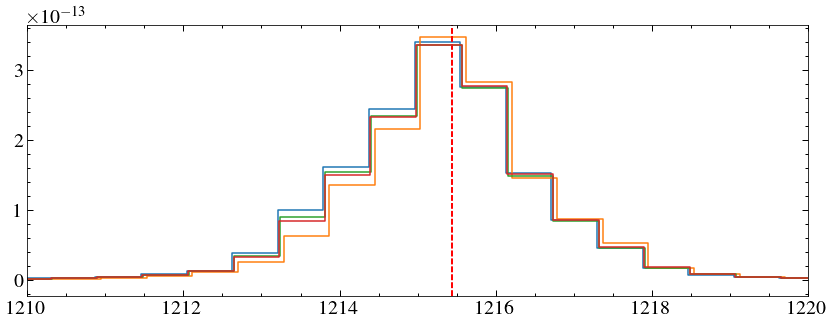

In [390]:
for x in g140l_x1ds:
    data = fits.getdata(x,1)[0]
    rootname = fits.getheader(x, 0)['ROOTNAME'] 
    date = fits.getheader(x, 0)['TDATEOBS']
    
   
    print(rootname,date)
    plt.step(data['WAVELENGTH'], data['FLUX'], where='mid')
  #  plt.step(data['WAVELENGTH'], data['ERROR'], where='mid')
    #plt.plot(data['WAVELENGTH'], data['FLUX'])
    #plt.plot(data['WAVELENGTH'], data['ERROR'])
    
   # plt.plot(lw, lf)
    plt.xlim(1210, 1220)

  #  plt.ylim(-1e-15, 1.4e-14)
   # plt.axhline(0, c='k', ls ='--')
    plt.axvline(1215.44, ls ='--', c='r')
    #plt.show()
plt.step(g140l_test['WAVELENGTH'], g140l_test['FLUX'], where='mid')


In [393]:
hdr = fits.Header(metadata)

In [399]:
primary_hdu = fits.PrimaryHDU(header=hdr)

In [428]:
test_data = dict(WAVELENGTH = w_new*u.AA, FLUX=f_new*u.erg/u.s/u.cm**2/u.AA)
test_data = Table(test_data)
#test_data

In [432]:
hdu = fits.table_to_hdu(test_data)

In [430]:
hdu.header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   16 / length of dimension 1                          
NAXIS2  =                 1024 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    2 / number of table fields                         
TTYPE1  = 'WAVELENGTH'                                                          
TFORM1  = 'D       '                                                            
TUNIT1  = 'Angstrom'                                                            
TTYPE2  = 'FLUX    '                                                            
TFORM2  = 'D       '        

In [438]:
descriptions =['midpoint of the wavelength bin', 'left/blue edge of the wavelength bin','right/red edge of the wavelength bin','average flux over the bin',
                'error on the flux','cumulative exposure time for the bin','data quality flags (HST data only)','modified julian date of start of first exposure', 
                'modified julian date of end of last exposure']
hdu.header.insert(8, ('EXTNAME','SPECTRUM'))
hdu.header.insert(9, ('EXTNO',2))

hdu.header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   16 / length of dimension 1                          
NAXIS2  =                 1024 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    2 / number of table fields                         
EXTNAME = 'SPECTRUM'                                                            
EXTNO   =                    2                                                  
TTYPE1  = 'WAVELENGTH'                                                          
TFORM1  = 'D       '                                                            
TUNIT1  = 'Angstrom'        

In [440]:
for i in enumerate(descriptions):
    hdu.header.insert(i[0]+10, ('TDESC%s' %(i[0]), i[1]))

In [441]:
hdu.header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   16 / length of dimension 1                          
NAXIS2  =                 1024 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    2 / number of table fields                         
EXTNAME = 'SPECTRUM'                                                            
EXTNO   =                    2                                                  
TDESC0  = 'midpoint of the wavelength bin'                                      
TDESC1  = 'left/blue edge of the wavelength bin'                                
TDESC2  = 'right/red edge of

In [442]:
hdul = fits.HDUList([primary_hdu, hdu])

In [443]:
hdul.writeto('test.fits')

In [445]:
hdul = fits.open('test.fits')

In [449]:
hdul[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
TELESCOP= 'HST     '                                                            
INSTRUME= 'STIS    '                                                            
GRATING = 'G140M   '                                                            
APERTURE= '52X0.1  '                                                            
TARGNAME= 'GJ699   '                                                            
RA_TARG =        269.447952129                                                  
DEC_TARG=        4.74810340755                                                  
PROPOSID=                15071                                                  
HLSPNAME= 'Measurements of t